# 1. Data Preparation

In [ ]:
# Import Library

import math
import statistics
import scipy.stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [ ]:
#upload Dataset

from google.colab import files
uploaded = files.upload()

Saving nyc-rolling-sales.csv to nyc-rolling-sales (1).csv


In [ ]:
#Import Dataset

df = pd.read_csv('nyc-rolling-sales.csv')
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [ ]:
# menghapus kolom yang tidak penting

df.drop(columns=['Unnamed: 0', 'EASE-MENT'], inplace = True)
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [ ]:
# cek 5 terbawah dari tabel dataset

df.tail()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,,10309,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,,10309,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,,10309,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,,10309,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,P9,155 CLAY PIT ROAD,,10309,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


In [ ]:
# Bentuk Dimensi DataFrame

df.shape

(84548, 20)

In [ ]:
# Daftar Nama Kolom

df.columns.values

array(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER',
       'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'], dtype=object)

In [ ]:
#Index

df.index

RangeIndex(start=0, stop=84548, step=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   BUILDING CLASS AT PRESENT       84548 non-null  object
 7   ADDRESS                         84548 non-null  object
 8   APARTMENT NUMBER                84548 non-null  object
 9   ZIP CODE                        84548 non-null  int64 
 10  RESIDENTIAL UNITS               84548 non-null  int64 
 11  COMMERCIAL UNITS                84548 non-null  int64 
 12  TOTAL UNITS                     84548 non-null

In [ ]:
df.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


In [ ]:
df.describe(include = object)

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,LAND SQUARE FEET,GROSS SQUARE FEET,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
count,84548,84548,84548,84548,84548,84548,84548,84548,84548,84548,84548
unique,254,47,11,167,67563,3989,6062,5691,166,10008,364
top,FLUSHING-NORTH,01 ONE FAMILY DWELLINGS,1,D4,131-05 40TH ROAD,,-,-,R4,-,2017-06-29 00:00:00
freq,3068,18235,38633,12663,210,65496,26252,27612,12989,14561,544


In [ ]:
# Cek nama kolom yang termasuk categorical
print('Nama Kolom')
for col in df.columns:
    if df[col].dtype=='object':
        print(col, df[col].nunique())

Nama Kolom
NEIGHBORHOOD 254
BUILDING CLASS CATEGORY 47
TAX CLASS AT PRESENT 11
BUILDING CLASS AT PRESENT 167
ADDRESS 67563
APARTMENT NUMBER 3989
LAND SQUARE FEET 6062
GROSS SQUARE FEET 5691
BUILDING CLASS AT TIME OF SALE 166
SALE PRICE 10008
SALE DATE 364


In [ ]:
# kolom numerik
numer = ['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE', 'BOROUGH']
for col in numer:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# kolom categorical
categ = ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']
for col in categ:
    df[col] = df[col].astype('category')

# kolom SALE DATE diubah menjadi datetime
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  int64         
 1   NEIGHBORHOOD                    84548 non-null  category      
 2   BUILDING CLASS CATEGORY         84548 non-null  category      
 3   TAX CLASS AT PRESENT            84548 non-null  category      
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   BUILDING CLASS AT PRESENT       84548 non-null  category      
 7   ADDRESS                         84548 non-null  object        
 8   APARTMENT NUMBER                84548 non-null  object        
 9   ZIP CODE                        84548 non-null  int64         
 10  RESIDENTIAL UNITS               84548 non-null  int64         
 11  CO

# 2. Data Cleaning

  **2.1 Check for Missing Value**

In [ ]:
print(df.isnull().sum())

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64


In [ ]:
from numpy import nan

#Untuk mengganti isi kolom blank dengan value 'nan'
df = df.replace(' ', nan)

In [ ]:
df.isna().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT           738
ADDRESS                               0
APARTMENT NUMBER                  65496
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

In [ ]:
#Menghitung berapa banyak presentasi missing value pada dataset

df.isna().sum() / len(df) *100

BOROUGH                            0.000000
NEIGHBORHOOD                       0.000000
BUILDING CLASS CATEGORY            0.000000
TAX CLASS AT PRESENT               0.872877
BLOCK                              0.000000
LOT                                0.000000
BUILDING CLASS AT PRESENT          0.872877
ADDRESS                            0.000000
APARTMENT NUMBER                  77.466055
ZIP CODE                           0.000000
RESIDENTIAL UNITS                  0.000000
COMMERCIAL UNITS                   0.000000
TOTAL UNITS                        0.000000
LAND SQUARE FEET                  31.049818
GROSS SQUARE FEET                 32.658372
YEAR BUILT                         0.000000
TAX CLASS AT TIME OF SALE          0.000000
BUILDING CLASS AT TIME OF SALE     0.000000
SALE PRICE                        17.222170
SALE DATE                          0.000000
dtype: float64

variabel Apartment Number memiliki jumlah missing value yang sangat banyak yaitu 77,4660% sehingga variabel tersebut lebih baik dihapus

In [ ]:
df.drop(labels=['APARTMENT NUMBER'], axis=1, inplace=True)

Nilai NaN pada categorical yaitu "variabel Tax class at present" dan "building class at present" dapat diganti dengan modus dari masing-masing variabel.

In [ ]:
df['TAX CLASS AT PRESENT'].fillna(df['TAX CLASS AT PRESENT'].mode()[0], inplace=True)
df['BUILDING CLASS AT PRESENT'].fillna(df['BUILDING CLASS AT PRESENT'].mode()[0], inplace=True)

untuk data int/float pada varibel "Sale Price", "land Square Feet", dan "Gross Square Feet" dapat diganti dengan mean atau median.

Namun sebelumnya kita harus mengetahui terlebih dahulu distribusi datanya melalui plot masing-masing variabel yang digunakan untuk mengetahui apakah missing value (NaN) pada masing-masing variabel tepat untuk diganti dengan nilai mean dan median.

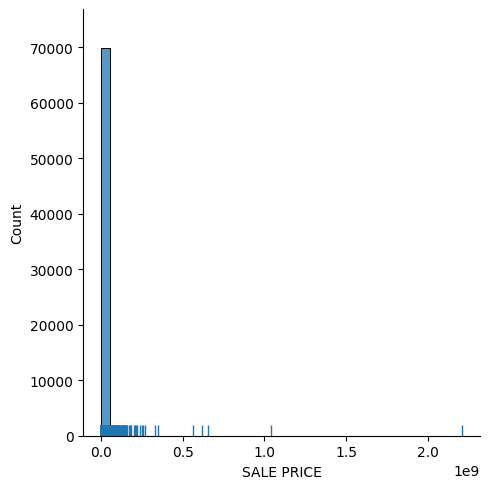

In [ ]:
sns.displot(df['SALE PRICE'], bins=40, rug=True)

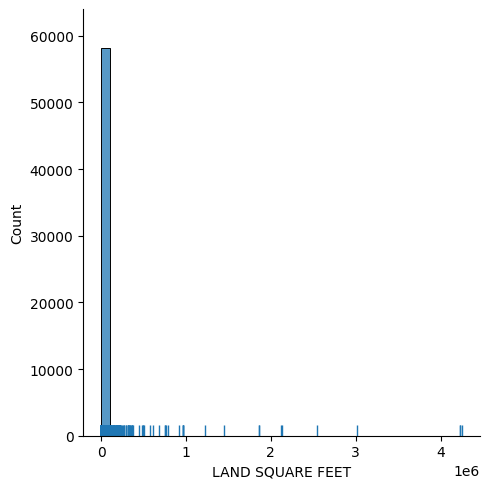

In [ ]:
sns.displot(df['LAND SQUARE FEET'], bins=40, rug=True)

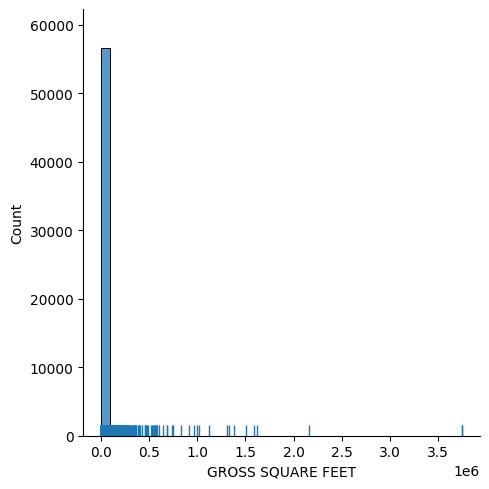

In [ ]:
sns.displot(df['GROSS SQUARE FEET'], bins=40, rug=True)

Syarat untuk mengganti missing value pada dataset:


1.   Mengganti dengan mean untuk histogram normal
2.   Mengganti dengan median untuk histogram skew

Dari data plot diatas variabel sale price, land square feet, dan gross square feet tidak menunjukan histogram normal maupun skew, sehingga missing pada ketiga variabel tersebut tidak dapat diganti dengan mean ataupun median.

Karena jumlah missing value berupa nilai NaN pada ketiga variabel tersebut tidak terlalu banyak yaitu 31,04% untuk land square, 23,65% untuk gross square feet, dan 17,22% untuk sale price (Ketiganya dibawah 50%), maka dari itu kita melakukan penghapusan pada baris row yang terdapat variabel NaN



In [ ]:
#untuk menghapus nilai NaN pada df

df = df.dropna()

In [ ]:
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of        BOROUGH  NEIGHBORHOOD  BUILDING CLASS CATEGORY  TAX CLASS AT PRESENT  \
0        False         False                    False                 False   
3        False         False                    False                 False   
4        False         False                    False                 False   
6        False         False                    False                 False   
9        False         False                    False                 False   
...        ...           ...                      ...                   ...   
84543    False         False                    False                 False   
84544    False         False                    False                 False   
84545    False         False                    False                 False   
84546    False         False                    False                 False   
84547    False         False                    False                

In [ ]:
df.shape

(48244, 19)

**2.2 Check for Duplicating Value**

In [ ]:
df.duplicated().any()

True

In [ ]:
#menentukan jumlah duplikat pada data

df.duplicated().sum()

348

In [ ]:
#menghapus duplikasi data pada dataset

df.drop_duplicates()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,10009,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,10309,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,10309,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,10309,2,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,10309,0,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21


In [ ]:
#mengurutkan index setelah penghapusan

df = df.drop_duplicates().reset_index(drop=True)
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23
4,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,10009,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07


# 3. Measure of Central Tendency


**3.1 mean**

In [ ]:
mean_total_unit = statistics.mean(df['TOTAL UNITS'])
mean_saleprice = statistics.mean(df['SALE PRICE'])
mean_landsq = statistics.mean(df['LAND SQUARE FEET'])
mean_grosssq = statistics.mean(df['GROSS SQUARE FEET'])

print("Mean dari data Total Units : ", mean_total_unit)
print("Mean dari data Sale Price : ", mean_saleprice)
print("Mean dari data Land Square Feet : ", mean_landsq)
print("Mean dari data Gross Square Feet : ", mean_grosssq)

Mean dari data Total Units :  2.791318690496075
Mean dari data Sale Price :  1158309.9487222314
Mean dari data Land Square Feet :  3270.9037706697845
Mean dari data Gross Square Feet :  3525.874749457157


**3.2 Median**

In [ ]:
median_total_unit = statistics.median(df['TOTAL UNITS'])
median_sale_price = statistics.median(df['SALE PRICE'])
median_land_square_feet = statistics.median(df['LAND SQUARE FEET'])
median_gross_square_feet = statistics.median(df['GROSS SQUARE FEET'])

print("Median dari data Total Units :", median_total_unit)
print("Median dari data Sale Price :", median_sale_price)
print("Median dari data Land Square Feet :", median_land_square_feet)
print("Median dari data Gross Square Feet :", median_gross_square_feet)

Median dari data Total Units : 1.0
Median dari data Sale Price : 485000.0
Median dari data Land Square Feet : 2133.0
Median dari data Gross Square Feet : 1620.0


**3.3 Modus**

In [ ]:
Borough = scipy.stats.mode(df['BOROUGH'])
Borough

ModeResult(mode=3, count=23843)

Keterangan:

1.   Manhattan
2.   Bronx

1.   Brooklyn
2.   Queens

1.   Staten Island

Modus borough adalah Brooklyn dengan total 23843

In [ ]:
Neighborhood = df['NEIGHBORHOOD'].value_counts()

mode_value = Neighborhood.idxmax()
mode_count = Neighborhood.max()

print(Neighborhood, mode_value)
print(mode_count)

BEDFORD STUYVESANT          1429
BOROUGH PARK                1235
SHEEPSHEAD BAY              1010
EAST NEW YORK                975
FLATBUSH-EAST                843
                            ... 
CITY ISLAND-PELHAM STRIP       1
BRONX PARK                     1
MORNINGSIDE HEIGHTS            0
FLUSHING MEADOW PARK           0
BLOOMFIELD                     0
Name: NEIGHBORHOOD, Length: 254, dtype: int64 BEDFORD STUYVESANT
1429


Modus Neighborhood adalah BEDFORD STUYVESANT dengan total 1429

In [ ]:
BCC = df['BUILDING CLASS CATEGORY'].value_counts()

mode_value = BCC.idxmax()
mode_count = BCC.max()

print(BCC, mode_value)
print(mode_count)

01 ONE FAMILY DWELLINGS                         14336
02 TWO FAMILY DWELLINGS                         12967
03 THREE FAMILY DWELLINGS                        3641
13 CONDOS - ELEVATOR APARTMENTS                  3244
10 COOPS - ELEVATOR APARTMENTS                   3174
07 RENTALS - WALKUP APARTMENTS                   2734
15 CONDOS - 2-10 UNIT RESIDENTIAL                 953
44 CONDO PARKING                                  782
04 TAX CLASS 1 CONDOS                             738
22 STORE BUILDINGS                                710
09 COOPS - WALKUP APARTMENTS                      614
14 RENTALS - 4-10 UNIT                            546
05 TAX CLASS 1 VACANT LAND                        509
12 CONDOS - WALKUP APARTMENTS                     458
29 COMMERCIAL GARAGES                             424
08 RENTALS - ELEVATOR APARTMENTS                  281
21 OFFICE BUILDINGS                               274
30 WAREHOUSES                                     250
31 COMMERCIAL VACANT LAND   

Modus BUILDING CLASS CATEGORY adalah 01 ONE FAMILY DWELLINGS dengan total 14336

# 4. Measure of Spread

**4.1 Range**

In [ ]:
total_unit = df['TOTAL UNITS']
sale_price = df['SALE PRICE']
land_square_feet= df['LAND SQUARE FEET']
gross_square_feet = df['GROSS SQUARE FEET']

# np.ptp() = Range of values (maximum - minimum) along an axis.
range_total_unit = np.ptp(total_unit)
range_sale_price = np.ptp(sale_price)
range_land_square_feet = np.ptp(land_square_feet)
range_gross_square_feet = np.ptp(gross_square_feet)

In [ ]:
print("Range dari data Total Units :", range_total_unit)
print("Range dari data Sale Price :", range_sale_price)
print("Range dari data Land Square Feet :", range_land_square_feet)
print("Range dari data Gross Square Feet :", range_gross_square_feet)

Range dari data Total Units : 2261
Range dari data Sale Price : 2210000000.0
Range dari data Land Square Feet : 4228300.0
Range dari data Gross Square Feet : 3750565.0


**4.2 Variance**

In [ ]:
variance_total_unit = statistics.variance(df['TOTAL UNITS'])
variance_sale_price = statistics.variance(df['SALE PRICE'])
variance_land_square_feet = statistics.variance(df['LAND SQUARE FEET'])
variance_gross_square_feet = statistics.variance(df['GROSS SQUARE FEET'])

In [ ]:
print("varian dari data Total Units : ", variance_total_unit)
print("varian dari data Sale Price : ", variance_sale_price)
print("Varian dari data Land Square Feet : ", variance_land_square_feet)
print("Varian dari data Gross Square Feet : ", variance_gross_square_feet)

varian dari data Total Units :  417.2964031801129
varian dari data Sale Price :  180704673693780.22
Varian dari data Land Square Feet :  933292915.5861255
Varian dari data Gross Square Feet :  852938213.028325


**4.3 Standar Deviation**

In [ ]:
std_total_unit = statistics.stdev(df['TOTAL UNITS'])
std_sale_price = statistics.stdev(df['SALE PRICE'])
std_land_square_feet = statistics.stdev(df['LAND SQUARE FEET'])
std_gross_square_feet = statistics.stdev(df['GROSS SQUARE FEET'])

In [ ]:
print("Standar Deviasi dari data Total Units : ", std_total_unit)
print("Standar Deviasi dari data Sale Price : ", std_sale_price)
print("Standar Deviasi dari data Land Square Feet : ", std_land_square_feet)
print("Standar Deviasi dari data Gross Square Feet : ", std_gross_square_feet)

Standar Deviasi dari data Total Units :  20.427834030560188
Standar Deviasi dari data Sale Price :  13442643.850589072
Standar Deviasi dari data Land Square Feet :  30549.843135213076
Standar Deviasi dari data Gross Square Feet :  29205.10594105635


# 5. Probability Distrinution

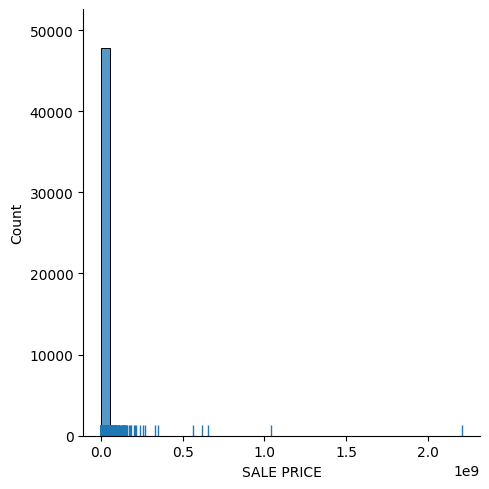

In [ ]:
sns.displot(df["SALE PRICE"], bins=40, rug=True)

<ipython-input-122-d6fbc09268d0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data_sale_price, bins=80, kde=True,rug=True, color="#710193")


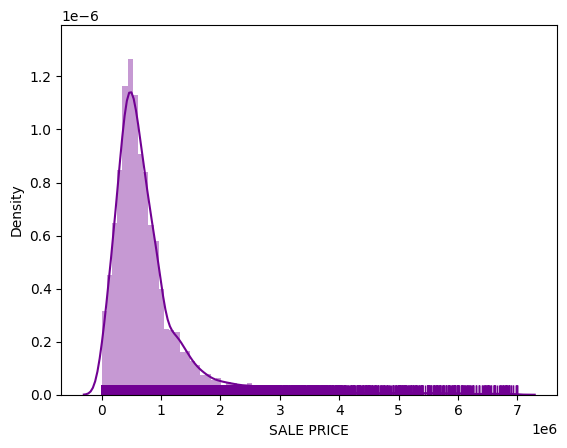

In [ ]:
# Mengambil data Sale Price dengan rentang harga 100 hingga 7000000
data_sale_price = df[(df["SALE PRICE"] > 100) & (df["SALE PRICE"] < 7000000)]["SALE PRICE"]
ax = sns.distplot(data_sale_price, bins=80, kde=True,rug=True, color="#710193")

# 6. Convidence Interval

Berdasarkan analisis diatas, memperoleh rata-rata Sale Price untuk Property di New York yaitu 1.158.309 dan wilayah yang paling sering muncul yaitu wilayah brooklyn.



In [ ]:
df_sale_price = df[['BOROUGH','SALE PRICE']]
df_sale_price

,BOROUGH,SALE PRICE
0,1,6625000.0
1,1,3936272.0
2,1,8000000.0
3,1,3192840.0
4,1,16232000.0
...,...,...
47891,5,450000.0
47892,5,550000.0
47893,5,460000.0
47894,5,11693337.0


In [ ]:
total = df_sale_price[
    (df_sale_price['SALE PRICE'] > 1500000)
    & (df_sale_price['BOROUGH'] == 3)].count()

total = total['BOROUGH']
total

2729

In [ ]:
total_1 = df_sale_price[df_sale_price['SALE PRICE'] > 1500000].count()

total_1 = total_1['SALE PRICE']
total_1

4474

In [ ]:
# Proporsi property dengan sale price > 1500000 di wilayah brooklyn
Proporsi_Property = total / total_1
Proporsi_Property

0.6099687080911935

In [ ]:
# Untuk menghitung standard error
n = total_1
standard_error = np.sqrt(Proporsi_Property * (1 - Proporsi_Property) / total)
standard_error

0.009336879112295674

In [ ]:
# Untuk membuat Confidence interval dengan z-score 1.96 untuk confidence interval 95%
z_score = 1.96
lb = Proporsi_Property - z_score* standard_error # lower bound CI
ub = Proporsi_Property + z_score* standard_error # upper bound CI
lb, ub

(0.591668425031094, 0.6282689911512931)

Dari perhitungan diatas, diperoleh Convidence interval untuk proporsi property dengan sale price > 1.500.000 yang berlokasikan di wilayag Brooklyn adalah di rentang 0,59 sampai 0,62


# 7. Hipotesis Testing

**Pertanyaan: Apakah ada perbedaan unit terjual antara property yang dibangun tahun 1900 - 2000 dan tahun 2001 ke atas?**

1.   Population :
  *   Total Units in NYC Property Sales Dataset
2.   Parameter of Interest :
  *   μ1 − μ2
  *   Year Built
1.   Taraf signifikansi :
  *   alpha = 5% = 0.05
2.   Hypothesis :
  *   H0 (Null Hypothesis) : μ1 = μ2 yang berarti tidak terdapat perbedaan unit terjual antara property yang dibangun tahun 1900 - 2000 dan tahun 2001 ke atas
  *   H1 (Alternative Hypthosis) : μ1 ≠ μ2 yang berarti terdapat perbedaan unit terjual antara property yang dibangun tahun 1900 - 2000 dan tahun 2001 ke atas)





In [ ]:
df_total_unit = df[['TOTAL UNITS','YEAR BUILT']]
df_total_unit.head()

,TOTAL UNITS,YEAR BUILT
0,5,1900
1,31,1900
2,17,1900
3,10,1913
4,6,1900


In [ ]:
df_total_unit["YEAR BUILT"] = df["YEAR BUILT"].astype("int")
df_kurang = df_total_unit[
    (df_total_unit['YEAR BUILT'] > 1899) &
    (df_total_unit['YEAR BUILT'] < 2001)]
df_kurang.head()

<ipython-input-134-3cca56608dfd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_unit["YEAR BUILT"] = df["YEAR BUILT"].astype("int")


,TOTAL UNITS,YEAR BUILT
0,5,1900
1,31,1900
2,17,1900
3,10,1913
4,6,1900


In [ ]:
# Data year built pada tahun 2001 keatas
df_lebih = df_total_unit[(df_total_unit['YEAR BUILT'] > 2001)]
df_lebih.head()

,TOTAL UNITS,YEAR BUILT
11,10,2009
73,47,2005
88,1,2014
89,1,2014
90,1,2014


In [ ]:
n1 = len(df_kurang)
mean1 = df_kurang["TOTAL UNITS"].mean()
std1 = df_kurang["TOTAL UNITS"].std()

(n1, mean1, std1)

(63800, 2.432037617554859, 20.953753516742022)

In [ ]:
n2 = len(df_lebih)
mean2 = df_lebih["TOTAL UNITS"].mean()
std2 = df_lebih["TOTAL UNITS"].std()

(n2, mean2, std2)

(11450, 2.2076855895196505, 13.981071402322064)

In [ ]:
sm.stats.ztest(df_kurang["TOTAL UNITS"], df_lebih["TOTAL UNITS"], alternative='two-sided')

(1.1024987351342665, 0.2702449080943581)

Syarat penlokan H0 :


*   H0 ditolak karna nilai p-value < alpha = 0,05

keputusan :


*   H0 ditolak karna nilai p-value = 0.2702449080943581 alpha = 0,05

kesimpulan :


*   pada taraf signifikansi alpha yaitu 5% dengan nilai p-value = 0.2702449080943581 < alpha = 0,05, maka kita dapat menolak H0 sehingga kita bisa mendapatkan sesuatu perbedaan unit yang terjual pada property yang dibangun tahun 1900-2000 dan tahun 2001 keatas yaitu niali rata-rata unit yang terjual pada property yang dibagun pada 1900 - 2000 tidak sama dengan property yang dibangun pada tahun 2001



# 8. Overall Analysis

    **Statistic in NYC Property Sales Dataset**





1.   Total Units
  *   Mean    :2.791318690496075
  *   Median  :1.0
  *   Range   :2261
  *   Varian  :417.2964031801129
  *   Standar Deviasi :20.427834030560188

2.   Sale Price
  *   Mean    :1158309.9487222314
  *   Median  :485000.0
  *   Range   :2210000000.0
  *   Varian  :180704673693780.22
  *   Standar Deviasi :13442643.850589072

1.   Land Square Feet
  *   Mean    :3270.9037706697845
  *   Median  :2133.0
  *   Range   :4228300.0
  *   Varian  :933292915.5861255
  *   Standar Deviasi :30549.843135213076

2.   Gross Square Feet
  *   Mean    :3525.874749457157
  *   Median  :1620.0
  *   Range   :3750565.0
  *   Varian  :852938213.028325
  *   Standar Deviasi :29205.10594105635

**Modus**
*   Data borough (wilayah) yang paling banyak muncul yaitu wilayah Brooklyn sebanyak 23.843
*   Data Neighborhood yang paling banyak muncul yaitu Bedford Stuyvesant sebanyak 1.429
*   Building Class Category (kategori bangunan) yang paling banyak muncul yaitu 01 ONE FAMILY DWELLINGS sebanyak 14.336

**Probability Distribution**

*   Plot data sale price menunjukkan persebaran data yang tidak baik karena terdapat banyak data Sale Price dengan nilai kecil ($0) sehingga nilai-nilai data kecil tersebut dihilangkan untuk melihat distribusi datanya.

*   Berdasarkan plot yang diambil dari data Sale Price dari 100 - 7000000 dapat disimpulkan bahwa data Sale Price dari 100 - 7000000 berdistribusi normal

**Confidence Interval**
*   Berdasarkan data analisis yang telah dilakukan di atas, diperoleh rata-rata Sale Price untuk property di New York yaitu 1.158.309 dan wilayah yang paling sering muncul yaitu wilayah Brooklyn.

*   Melalui perhitungan yang telah saya hitung di atas, diperoleh Confidence interval untuk proporsi property dengan sale price > 1.500.000 yang berlokasi di wilayah Brooklyn adalah di rentang 0.59 sampai dengan 0.62

**Hipotesis Testing**

*   Pada taraf signifikansi alpha yaitu 5% dengan nilai p-value = 0.2702449080943581 < alpha = 0.05, maka kita dapat menolak H0 sehingga kita mendapatkan suatu perbedaan unit yang terjual pada property yang dibangun tahun 1900 - 2000 dan tahun 2001 keatas yaitu nilai rata-rata unit yang terjual pada property yang dibangun pada tahun 1900 - 2000 tidak sama dengan property yang dibangun pada tahun 2001 keatas